# Analysis of UQ runs
These notebooks will be used to plot data and data analysis for UQ runs for SOFE 2023.


## Run information

- baseline 2018
- pnetel is 400.
- Fixed rmajor to 9.0, the average of a previous uq run.
- Maximise Net Electric
- pheat turned on
- UQ bounds ~10%

## Import the Uncertainty Data and create object

## Calculate Sensitivity Indices and Reliability

In [1]:
%load_ext autoreload
%autoreload 1
from pathlib import Path
import sys
sys.path.append('/home/graeme/process_uq/')
sys.path.append('/home/graeme/PROCESS_SALib/')
from uq_analysis import UncertaintyData, Copula, InteractivePlot
# from bokeh.plotting import figure 
from bokeh.io import output_notebook
output_notebook()

proj_dir = str(Path.cwd())+"/"
proj_dir = "/home/graeme/data/uq_run_data/flat_dist_runs/"
figure_of_merit = "powfmw"
uq_data = UncertaintyData(proj_dir, figure_of_merit)
print("number of converged samples:",len(uq_data.converged_df))



Loading BokehJS ...

number of converged samples: 10509


In [2]:
uq_data.calculate_sensitivity(figure_of_merit)
uq_data.calculate_reliability()
# print("rmajor mean: ", round(uq_data.converged_df["rmajor"].mean(),2))
print("Number of samples: ", len(uq_data.uncertainties_df))
print(
    "Number of converged runs: ",
    uq_data.number_of_converged_runs,
)
print("Reliability: ", uq_data.reliability_index)


Number of samples:  34541
Number of converged runs:  10509
Reliability:  0.3


## Regional Sensitivity - what causes PROCESS to converge?

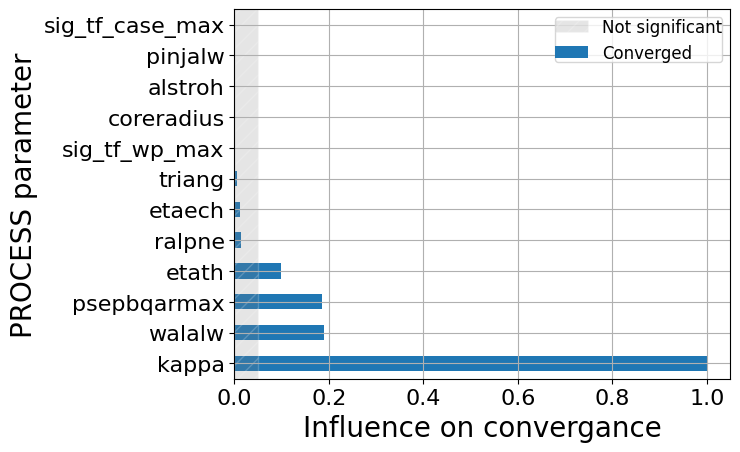

['kappa', 'walalw', 'psepbqarmax']


In [3]:
uq_data.convergence_regional_sensitivity_analysis(uq_data.input_names)
uq_data.plot_sumsq_sensitivity()
significant_conv_vars = uq_data.find_significant_parameters(uq_data.sumsq_sensitivity_df,"unconverged",0.10).tolist()
print(significant_conv_vars)

## Find the iteration variables which are influential for the significant convergence variables

['kappa', 'walalw', 'psepbqarmax']
kappa
0    2.0732
0    2.1569
0    2.1658
0    2.0641
0    1.8653
      ...  
0    2.0459
0    1.9983
0    2.0204
0    2.1459
0    2.1333
Name: kappa, Length: 10509, dtype: float64
        bt      te      beta          dene   tfcth   wallmw    ohcth    bigq  \
0   5.1115  12.758  0.030022  6.647000e+19  1.4184  0.75191  0.86231  28.094   
0   5.1089  12.583  0.029376  6.623300e+19  1.4388  0.72097  0.86425  33.657   
0   5.1090  12.857  0.029916  6.635600e+19  1.4316  0.72824  0.86422  29.757   
0   5.1169  12.163  0.028781  6.886700e+19  1.4066  0.66562  0.87520  29.982   
0   5.1945  12.450  0.031436  7.299500e+19  1.4437  0.87703  0.89989  37.193   
..     ...     ...       ...           ...     ...      ...      ...     ...   
0   5.1708  13.293  0.037206  7.965700e+19  1.4000  1.18030  0.84131  45.881   
0   5.2010  12.513  0.032706  7.724300e+19  1.4078  0.92766  0.86329  37.625   
0   5.1276  12.507  0.033663  7.520200e+19  1.4032  0.98796  0.8

/home/graeme/PROCESS_SALib/src/SALib/analyze/rsa.py:179: RuntimeWarning: All-NaN slice encountered
  return r_s / np.nanmax(r_s), quants


TypeError: no numeric data to plot

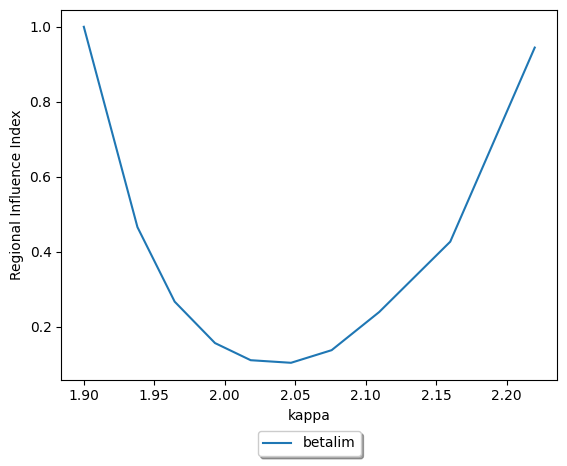

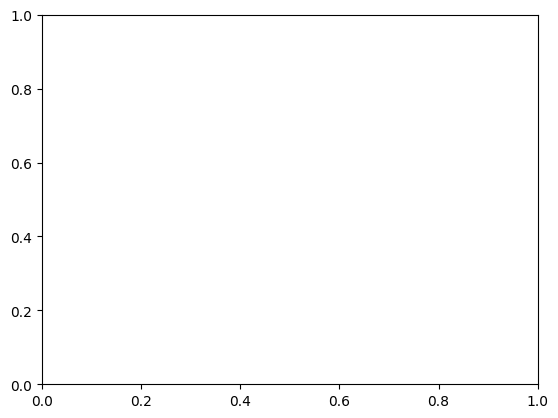

In [4]:
rsa_variables = uq_data.itv
# rsa_variables.append("kappa")
# rsa_variables = ["betalim","pdivt","powfmw"]
significant_itv_list = ["kappa"]
significant_conv_vars=["kappa","etath"]
for item in significant_conv_vars:
    print(item)
    rsa_df = uq_data.regional_sensitivity_analysis(figure_of_merit=item,variables_to_sample=rsa_variables, dataframe=uq_data.converged_df, bins=10, confidence_level = 0.4)
    significant_itv_list.extend(rsa_df.index.tolist())
significant_itv_list = list(dict.fromkeys(significant_itv_list))
print("These iteration values drive performance recovery:", significant_itv_list)

## Create a copula based on the important variables for convergence and iteration variables

In [ ]:
copula = Copula(uq_data.converged_df, significant_conv_vars)
copula.calculate_copula(input_sample_size=500,synthetic_sample_size=50000)
copula.calculate_pdf()
# copula.find_most_likely(copula.sampled_input_data,copula.synthetic_data)
copula.print_copula_data()
pdf_df=copula.create_pdf_df()
copula.find_max_pdf(print_data=False)
# for item in significant_conv_vars:
#     copula.plot_ecdf_comparison(item)
# copula.plot_2d("kappa","cohbop")
# copula.plot_2d("etath","powfmw")
# copula.plot_2d("etath","wallmw")500
# copula.plot_2d("etath","dene")
# copula.plot_pdf(["etath"])
# copula.plot_pdf(["cohbop"])

# # copula.plot_pdf(["pdivt"])
# uq_data.regional_sensitivity_analysis(figure_of_merit="etath",variables_to_sample=significant_itv_list, dataframe=copula.synthetic_data, bins=5, confidence_level = 0.2)
# uq_data.regional_sensitivity_analysis(figure_of_merit="kappa",variables_to_sample=significant_itv_list, dataframe=copula.synthetic_data, bins=5,confidence_level = 0.2)


In [ ]:
# itv_vars = significant_conv_vars + significant_itv_list
# print(significant_itv_list)
# itv_copula = Copula(uq_data.converged_df,itv_vars)
# itv_copula.calculate_copula(input_sample_size=200,synthetic_sample_size=10000)
# itv_copula.calculate_pdf()
# # itv_copula.print_copula_data()
# itv_pdf_df=itv_copula.create_pdf_df()
# itv_copula.plot_2d("kappa","betalim")
# itv_copula.plot_2d("kappa","betalim")
# itv_copula.plot_2d("kappa","vdalw")
# itv_copula.plot_2d("kappa","te")
# itv_copula.plot_2d("kappa","coheof")
# itv_copula.plot_2d("kappa","ohcth")
# print("Peak PDF values:")


In [ ]:
sens_plots=InteractivePlot(uq_data,copula)
sens_plots.create_layout(significant_conv_vars)

In [ ]:
itv_plots=InteractivePlot(uq_data,itv_copula)
itv_plots.create_layout(itv_vars)

In [ ]:
# sig_variables=(uq_data.find_significant_parameters(uq_data.sumsq_sensitivity_df,"unconverged",0.05))
# copula = Copula(uq_data.uncertainties_df, ["kappa","etath","sqsumsq"])
# copula.calculate_copula(100)
# copula.print_copula_data()
# copula.calculate_pdf()
# copula.plot_2d("sqsumsq","kappa")
# copula.plot_pdf("kappa")
# copula.plot_ecdf_comparison("kappa")
# copula.plot_ecdf_comparison("etath")


In [ ]:
# cop_data = UncertaintyData(proj_dir, figure_of_merit)
# cop_data.uncertainties_df = copula.synthetic_data
# cop_data.converged_df = cop_data.uncertainties_df[cop_data.uncertainties_df["sqsumsq"] <= -8.0]
# cop_data.calculate_reliability()
# print(cop_data.reliability_index)


## Plot ECDF and Most Reliabile Values

Compare the blue and red plots to see how similar the distributions of the sampled points which converge (blue) and don't converge (red).

Orange plots the convergence rate for a given bin of sampled points.

In [ ]:
# uq_data.ecdf_plot("kappa")
# uq_data.ecdf_plot("etath")
# uq_data.ecdf_plot("triang")
# uq_data.ecdf_plot("ralpne")
# uq_data.ecdf_plot("walalw")
# uq_data.ecdf_plot("powfmw")
# uq_data.ecdf_plot("wallmw")

## Plot the Figure of Merit with Significant Input Parameters

In [ ]:
# vtp=uq_data.find_significant_parameters(uq_data.sensitivity_df,"S1",0.05).values
# # #vtp=uq_data.find_influential_conv_parameters().values
# # # vtp = np.append(vtp,"walalw")
# vtp = [ "kappa", "etath"]#,"bt", "beta", "dene", "tfcth", "wallmw", "ohcth", "bigq", "bore", "betalim", "coheof", "cohbop", "gapoh", "fvsbrnni", "itvar019", "itvar020", "jwptf", "vtfskv", "vdalw", "tdmptf", "thkcas", "thwcndut", "fcutfsu", "cpttf", "gapds", "plhthresh", "tmargtf", "tmargoh", "oh_steel_frac"]
# uq_data.sampled_vars_to_plot = vtp
# uq_data.configure_data_for_plotting()
# uq_data.plot_scatter_plot(plot_unconverged=False
#                           )